# Community location

This page shows the location (by continent or country) of the OLS community members, given their different roles

In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
path = geopandas.datasets.get_path('naturalearth_lowres')
world_df = geopandas.read_file(path)
url = 'https://raw.githubusercontent.com/open-life-science/open-life-science.github.io/main/_data/artifacts/people.csv'
people_df = pd.read_csv(url, index_col=0)

/var/folders/k_/5472klmd4fdb_wdkwgm7_n8m0000gp/T/ipykernel_33242/1319868172.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = geopandas.datasets.get_path('naturalearth_lowres')


Number of people

In [19]:
len(people_df)

576

## Continents

Proportion of people without continent information

In [3]:
people_df.continent.isna().sum() / len(people_df.continent)

0.07465277777777778

Continent repartition

In [23]:
continents_df = (
    people_df
    .groupby(["continent"])
    .count()
    .rename(columns={"country_3": "Total"})
    .drop(columns=["city", "first-name", "last-name", "pronouns", "country", "longitude", "latitude", "mastodon"])
)
continents_df["Percentage"] = 100 * continents_df.Total / continents_df.Total.sum(axis = 0)
continents_df = continents_df.sort_values("Percentage", ascending=False)
continents_df

,Total,Percentage
continent,,
Europe,257,48.217636
Africa,86,16.135084
North America,70,13.133208
South America,65,12.195122
Asia,46,8.630394
Oceania,9,1.688555


Text(0.5, 0, '')

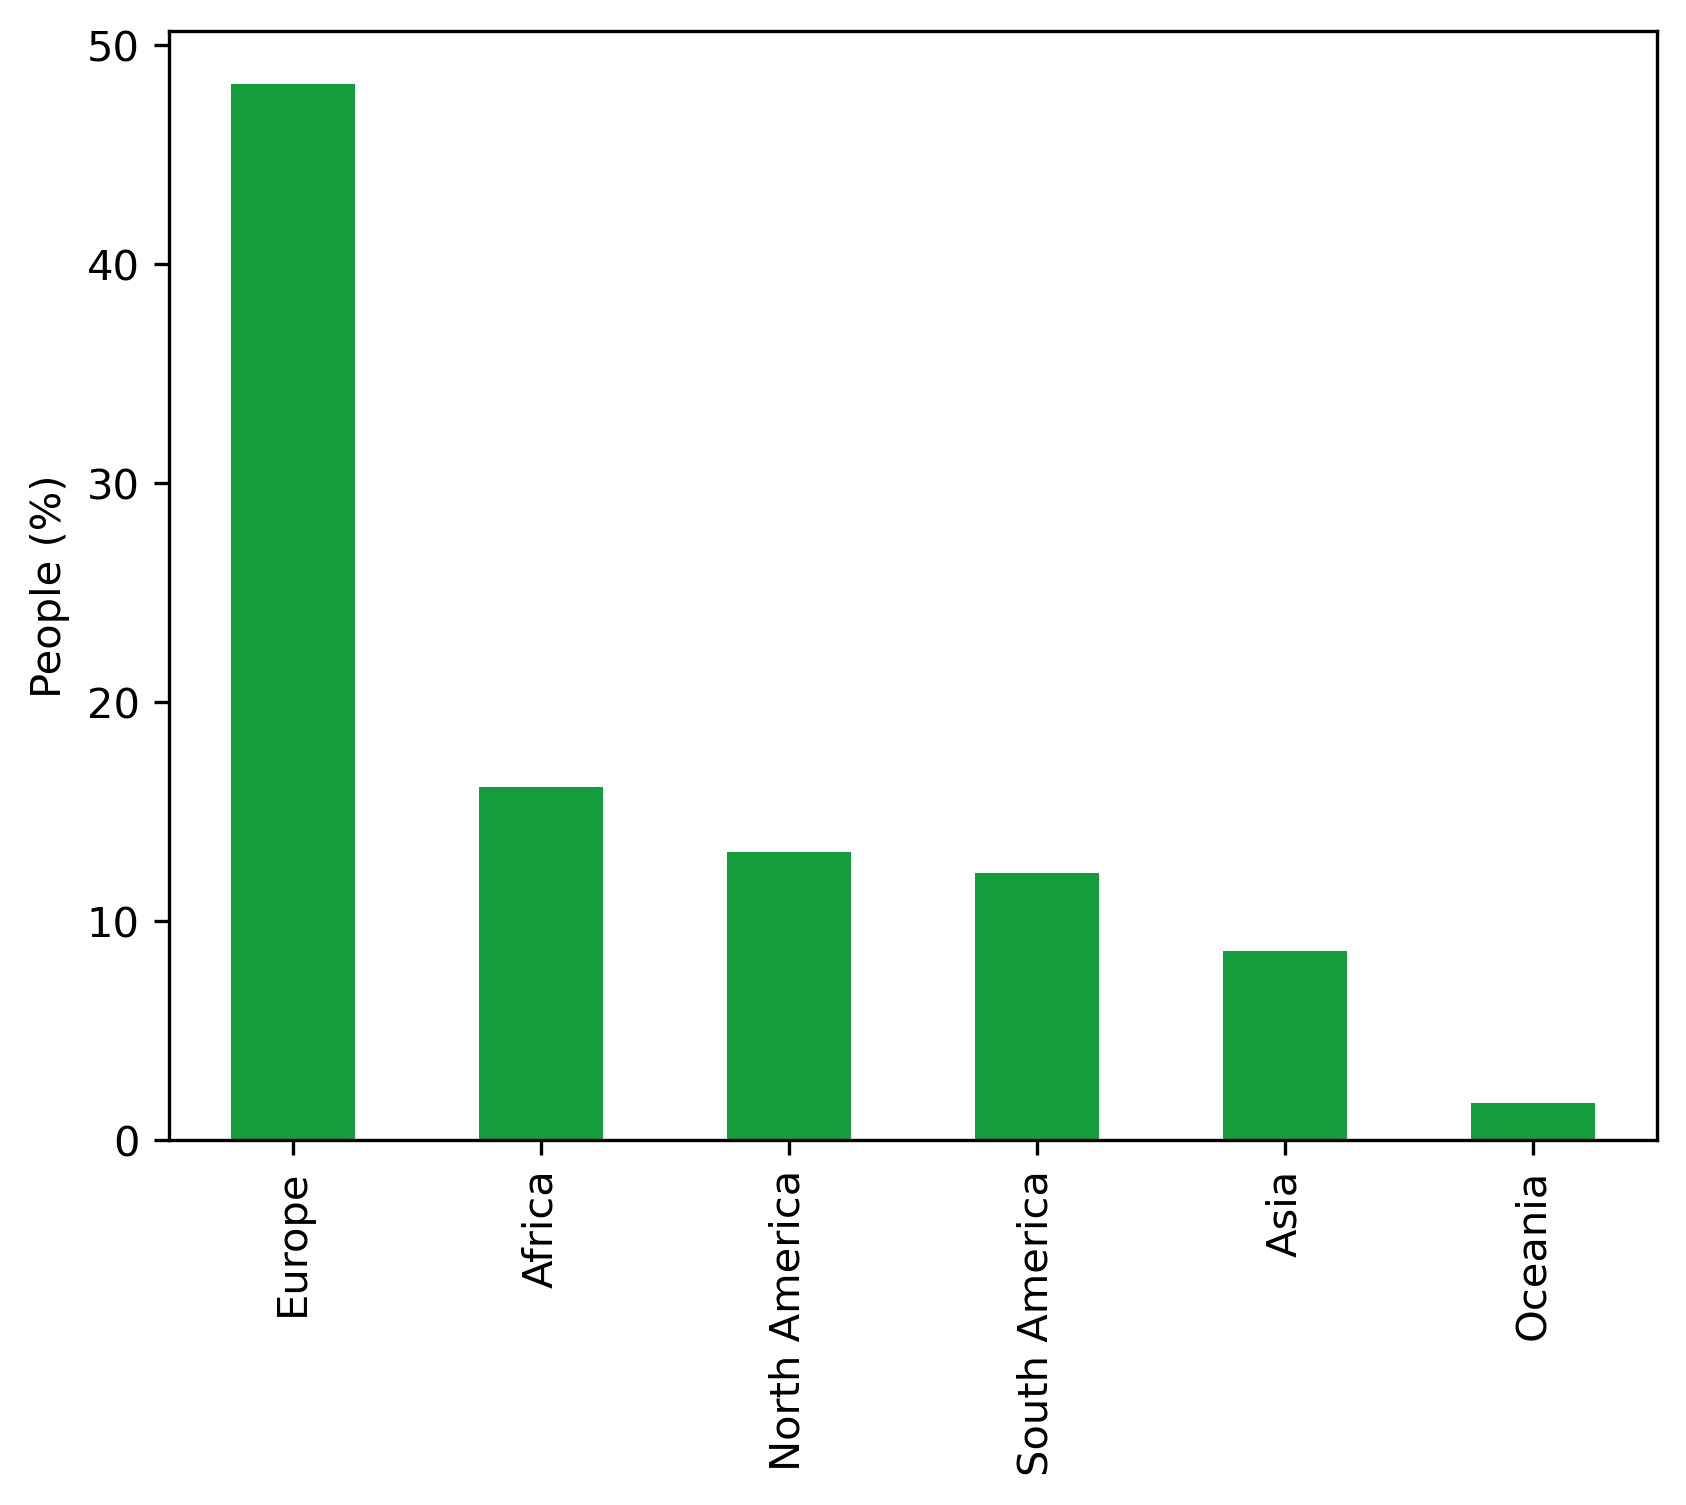

In [29]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continents_df.Percentage
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("People (%)")
plt.xlabel("")

## Countries

Proportion of people without country information

In [8]:
people_df.country.isna().sum() / len(people_df.country)

0.06076388888888889

Country repartition

In [10]:
countries_df = (
    people_df
    .groupby(["country"])
    .count()
    .rename(columns={"country_3": "Total"})
    .drop(columns=["city", "first-name", "last-name", "pronouns", "continent", "longitude", "latitude", "mastodon"])
)
countries_df['Percentage'] = 100 * countries_df.Total / countries_df.Total.sum(axis = 0)
countries_df

,Total,Percentage
country,,
Argentina,32,6.003752
Australia,9,1.688555
Austria,1,0.187617
Bangladesh,1,0.187617
Belgium,2,0.375235
Benin,1,0.187617
Bolivia,0,0.000000
Brazil,17,3.189493
Cameroon,11,2.063790


## Map

In [13]:
country_code_df = (
    people_df
    .groupby(["country_3"])
    .count()
    .rename(columns = {"country": "total"})
    .drop(columns = ["city", "first-name", "last-name", "pronouns", "continent", "longitude", "latitude", "mastodon"])
)
country_code_df = 100 * country_code_df / country_code_df.sum(axis = 0)
country_code_df = (
    country_code_df
    .rename_axis("iso_a3")
    .reset_index()
)
country_world_df = pd.merge(world_df, country_code_df, on="iso_a3", how="outer")
country_world_df["total"].fillna(0, inplace=True)
country_world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000000
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.000000
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000000
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2.814259
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9.943715


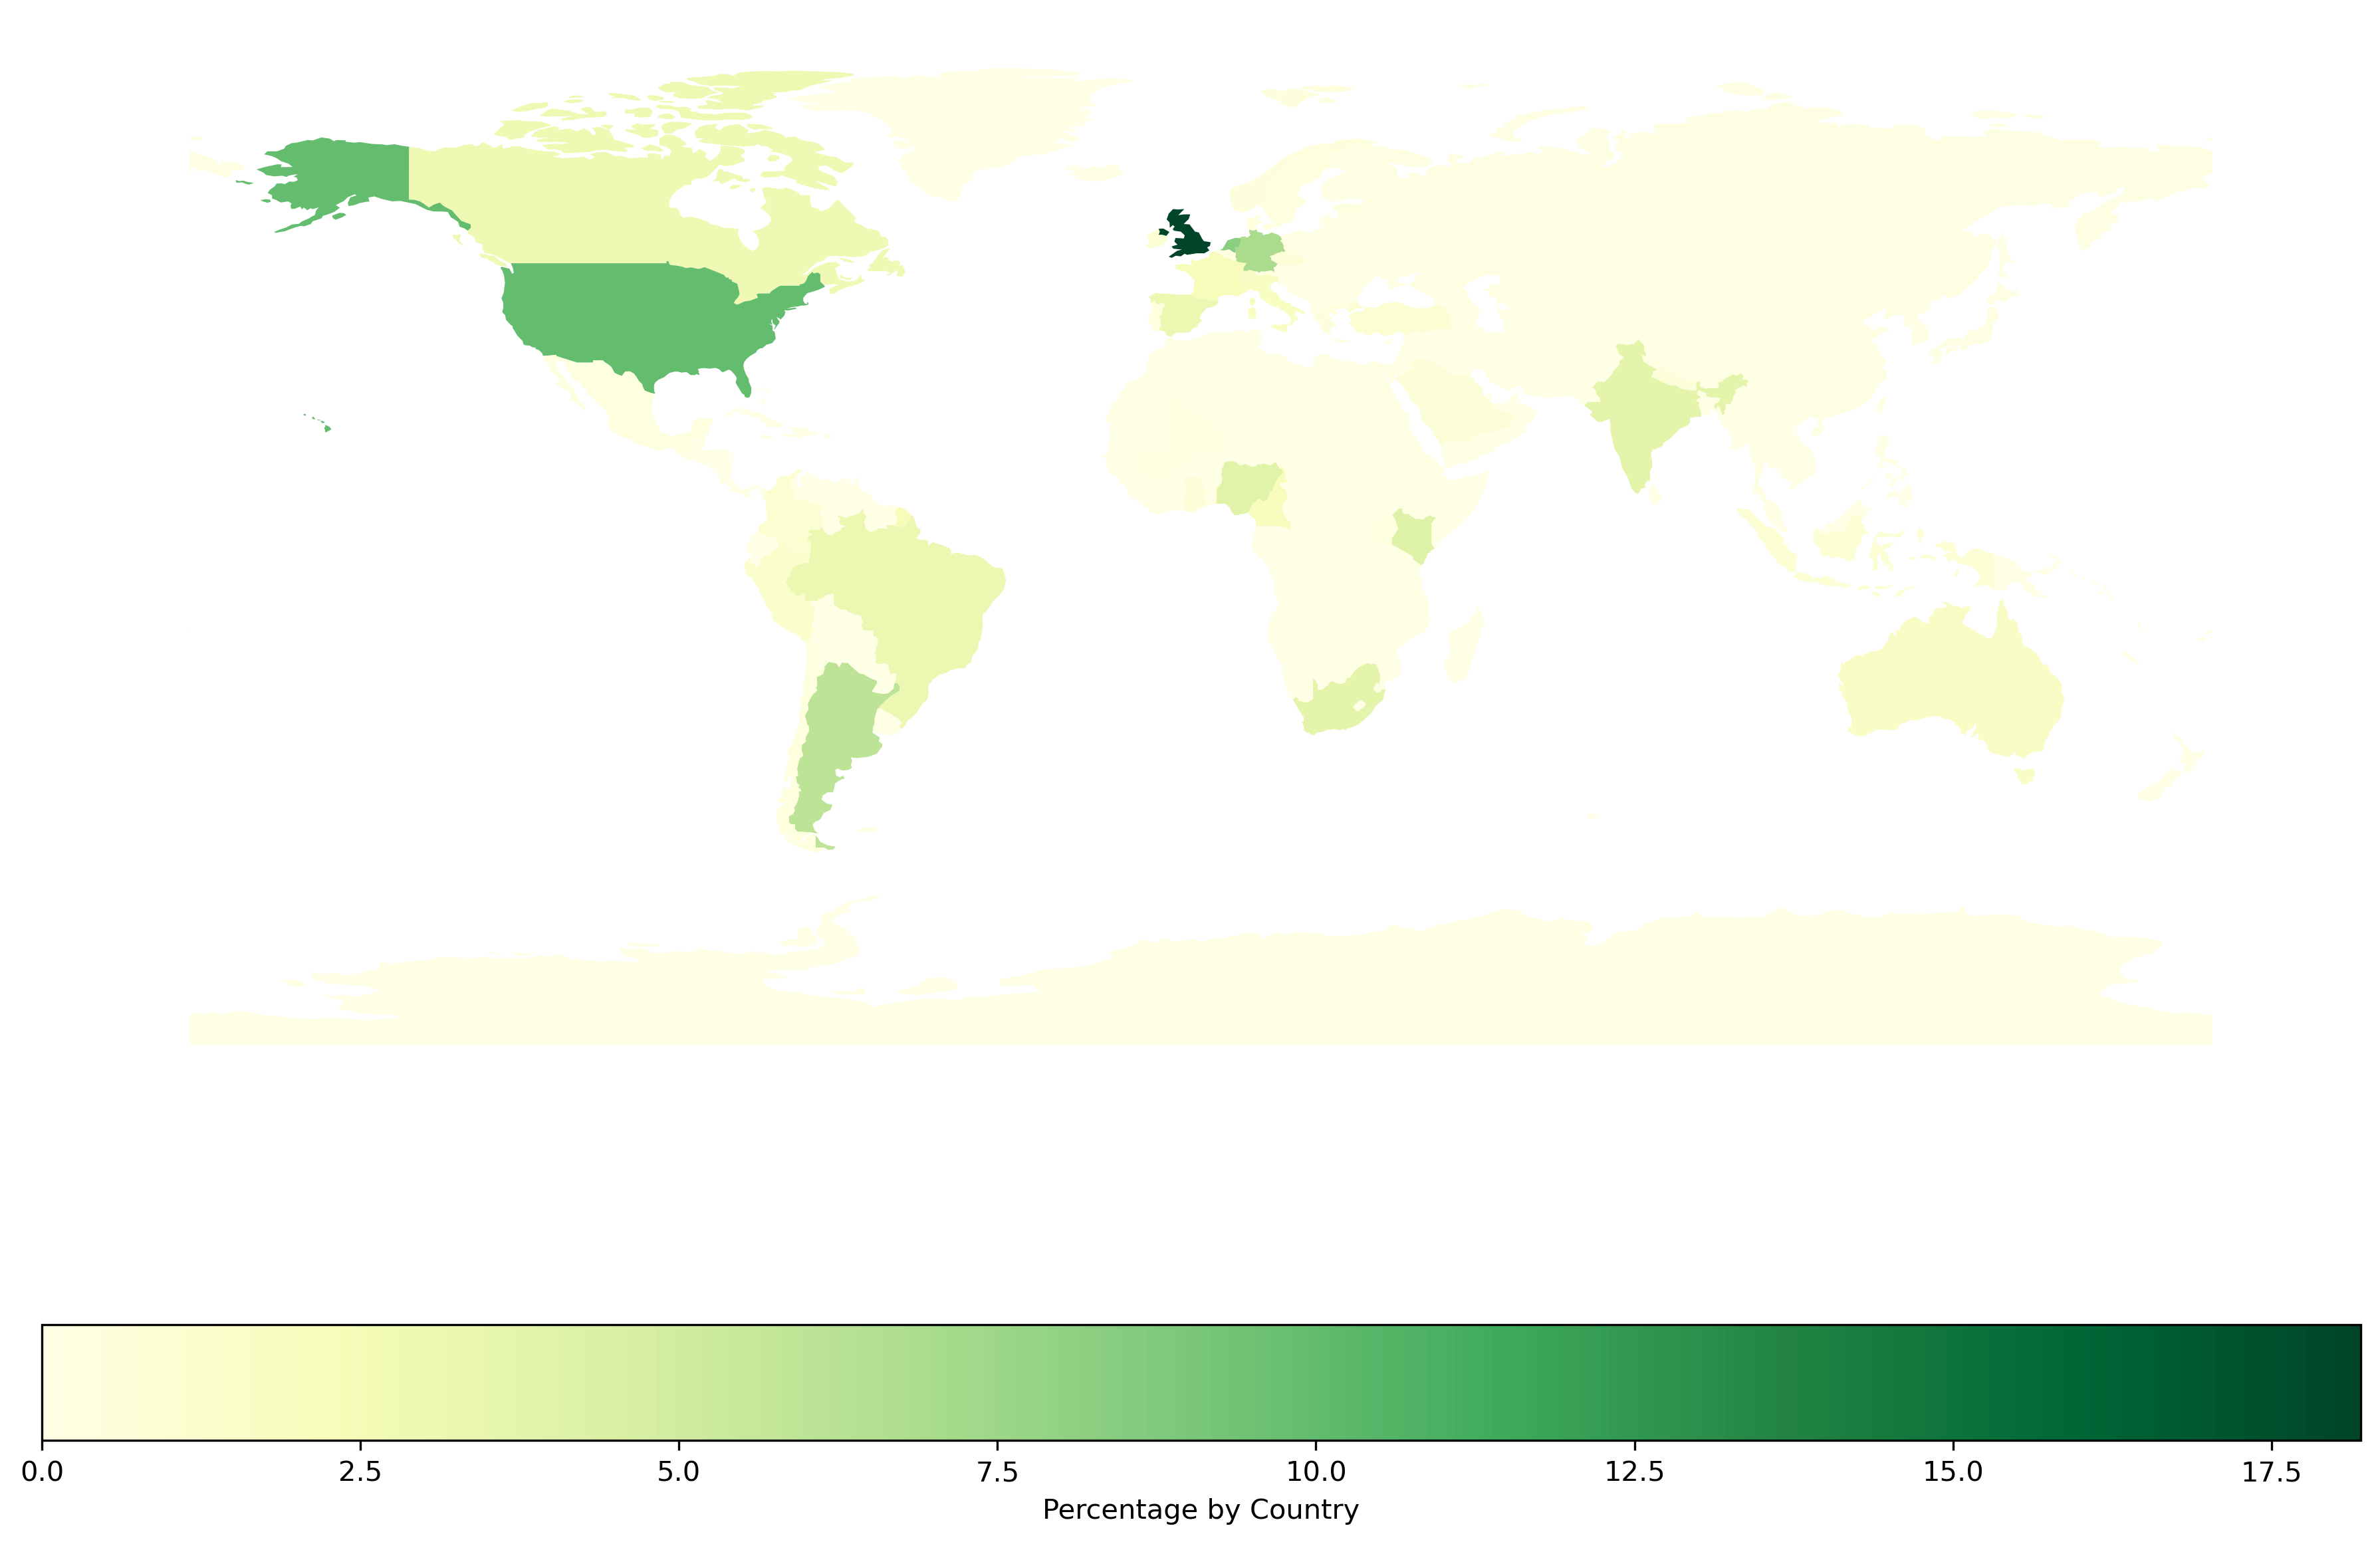

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_dpi(300)

country_world_df.plot(
    column="total",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Percentage by Country", "orientation": "horizontal"},
    cmap="YlGn")
ax.set_axis_off()
plt.savefig(f'../results/location.png', bbox_inches='tight')